In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def plot_distribution(app_name: str):
    merged_data = pd.read_csv(f'result/{app_name}/{app_name}_combined.csv')

    # Define the custom color (R: 146, G: 200, B: 185)
    custom_color = "#2E9D7C"

    # Set up the style for plots with the custom color
    sns.set_style("whitegrid")

    # Plotting
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot rating distribution
    sns.histplot(data=merged_data, x='rating', bins=5, ax=axes[0, 0], kde=True, color=custom_color)
    axes[0, 0].set_title('Rating Distribution')
    axes[0, 0].set_xlabel('Rating')
    axes[0, 0].set_ylabel('Count')

    # Plot polarity distribution
    sns.histplot(data=merged_data, x='polarity', bins=10, ax=axes[0, 1], kde=True, color=custom_color)
    axes[0, 1].set_title('Polarity Distribution')
    axes[0, 1].set_xlabel('Polarity')
    axes[0, 1].set_ylabel('Count')

    # Plot subjectivity distribution
    sns.histplot(data=merged_data, x='subjectivity', bins=10, ax=axes[1, 0], kde=True, color=custom_color)
    axes[1, 0].set_title('Subjectivity Distribution')
    axes[1, 0].set_xlabel('Subjectivity')
    axes[1, 0].set_ylabel('Count')

    # Plot similarity score distribution
    sns.histplot(data=merged_data, x='similarity score', bins=10, ax=axes[1, 1], kde=True, color=custom_color)
    axes[1, 1].set_title('Similarity Score Distribution')
    axes[1, 1].set_xlabel('Similarity Score')
    axes[1, 1].set_ylabel('Count')

    # Adjust layout
    plt.tight_layout()

    # Save the entire layout as a single image
    fig.savefig(f'result/{app_name}/{app_name}.png')
    
    plt.show()

ValueError: Could not interpret value `rating` for `x`. An entry with this name does not appear in `data`.

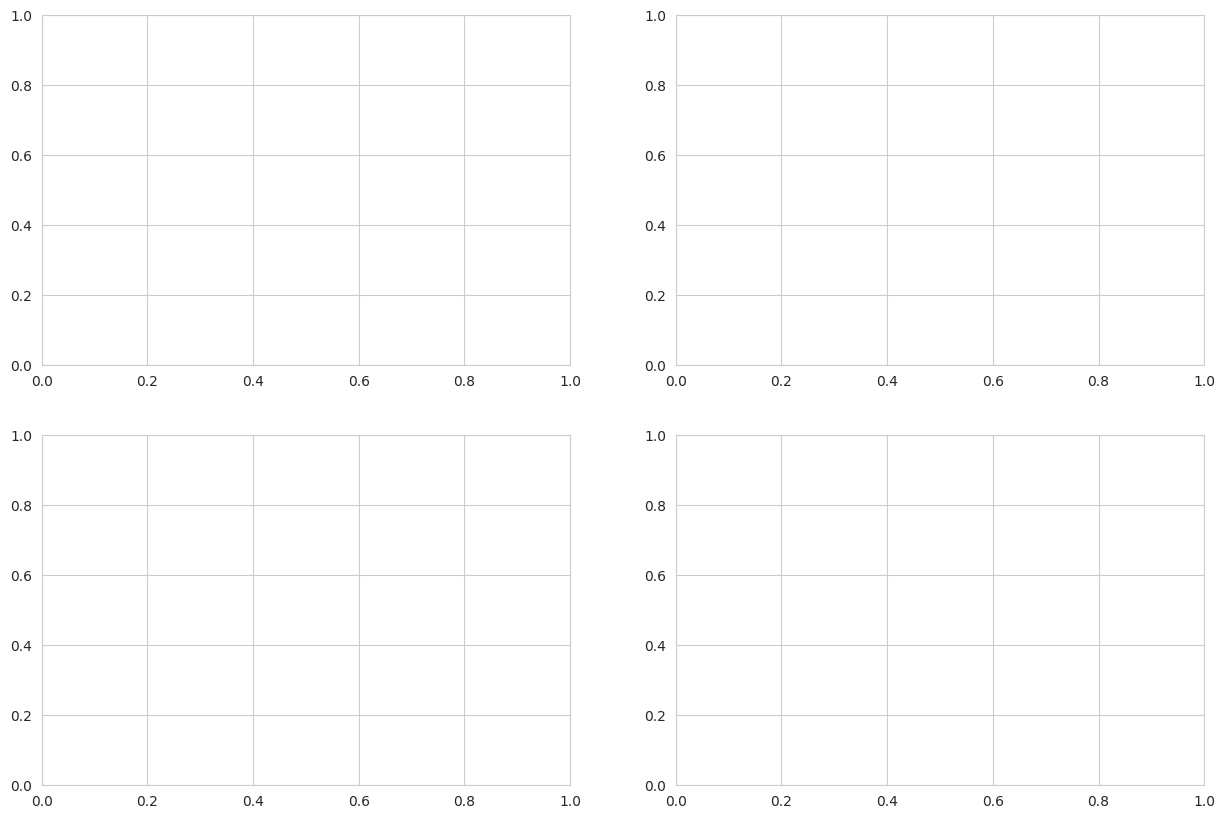

In [5]:
plot_distribution('form-swim')